Epoch 1/50
235/235 - 3s - loss: 1.6481 - accuracy: 0.6050 - val_loss: 0.8694 - val_accuracy: 0.8290 - 3s/epoch - 11ms/step
Epoch 2/50
235/235 - 1s - loss: 0.5659 - accuracy: 0.8611 - val_loss: 0.4520 - val_accuracy: 0.8858 - 1s/epoch - 5ms/step
Epoch 3/50
235/235 - 1s - loss: 0.3832 - accuracy: 0.8956 - val_loss: 0.3515 - val_accuracy: 0.9098 - 1s/epoch - 5ms/step
Epoch 4/50
235/235 - 1s - loss: 0.3241 - accuracy: 0.9082 - val_loss: 0.3103 - val_accuracy: 0.9174 - 917ms/epoch - 4ms/step
Epoch 5/50
235/235 - 1s - loss: 0.2909 - accuracy: 0.9173 - val_loss: 0.2905 - val_accuracy: 0.9218 - 892ms/epoch - 4ms/step
Epoch 6/50
235/235 - 1s - loss: 0.2675 - accuracy: 0.9230 - val_loss: 0.2645 - val_accuracy: 0.9296 - 903ms/epoch - 4ms/step
Epoch 7/50
235/235 - 1s - loss: 0.2493 - accuracy: 0.9285 - val_loss: 0.2515 - val_accuracy: 0.9313 - 910ms/epoch - 4ms/step
Epoch 8/50
235/235 - 1s - loss: 0.2339 - accuracy: 0.9327 - val_loss: 0.2300 - val_accuracy: 0.9369 - 863ms/epoch - 4ms/step
Epoch 9/

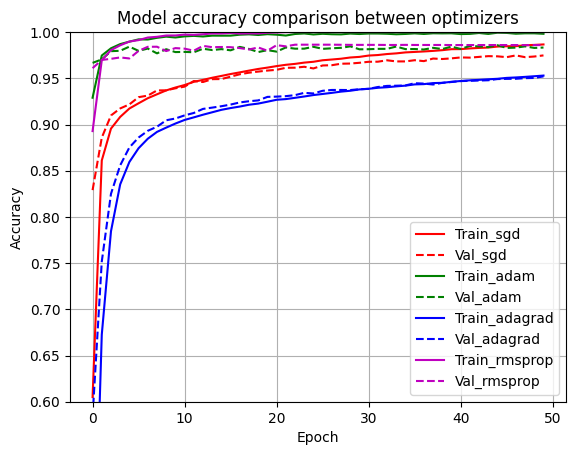

In [4]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

# fashion MNIST 읽어와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train=x_train.astype(np.float32)/225.0
x_test=x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test= tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정정
n_input=784
n_hidden1=1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=50

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
  model=Sequential()
  model.add(Dense(units=n_hidden1, activation='relu',input_shape=(n_input,)))
  model.add(Dense(units=n_hidden2, activation='relu'))
  model.add(Dense(units=n_hidden3, activation='relu'))
  model.add(Dense(units=n_hidden4, activation='relu'))
  model.add(Dense(units=n_output, activation='softmax'))
  return model

# SGD 옵티마이저를 사용하는 모델
dmlp_sgd=build_model()
dmlp_sgd.compile(loss='categorical_crossentropy', optimizer=SGD(),metrics=['accuracy'])
hist_sgd=dmlp_sgd.fit(x_train, y_train, batch_size=batch_siz, epochs=n_epoch, validation_data=(x_test, y_test),verbose=2)

# Adam 옵티마이저를 사용하는 모델
dmlp_adam=build_model()
dmlp_adam.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
hist_adam=dmlp_adam.fit(x_train, y_train, batch_size=batch_siz, epochs=n_epoch, validation_data=(x_test, y_test),verbose=2)

# Adagrad 옵티마이저를 사용하는 모델
dmlp_adagrad=build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy', optimizer=Adagrad(),metrics=['accuracy'])
hist_adagrad=dmlp_adagrad.fit(x_train, y_train, batch_size=batch_siz, epochs=n_epoch, validation_data=(x_test, y_test),verbose=2)

# RMSprop 옵티마이저를 사용하는 모델
dmlp_rmsprop=build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
hist_rmsprop=dmlp_rmsprop.fit(x_train, y_train, batch_size=batch_siz, epochs=n_epoch, validation_data=(x_test, y_test),verbose=2)

# 네 모델의 정확률을 측정
print("SGD 정확률은 ", dmlp_sgd.evaluate(x_test, y_test, verbose=0)[1]*100)
print("Adam 정확률은 ", dmlp_adam.evaluate(x_test, y_test, verbose=0)[1]*100)
print("Adagrad 정확률은 ", dmlp_adagrad.evaluate(x_test, y_test, verbose=0)[1]*100)
print("RMSprop 정확률은 ", dmlp_rmsprop.evaluate(x_test, y_test, verbose=0)[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist_sgd.history['accuracy'],'r')
plt.plot(hist_sgd.history['val_accuracy'],'r--')
plt.plot(hist_adam.history['accuracy'],'g')
plt.plot(hist_adam.history['val_accuracy'],'g--')
plt.plot(hist_adagrad.history['accuracy'],'b')
plt.plot(hist_adagrad.history['val_accuracy'],'b--')
plt.plot(hist_rmsprop.history['accuracy'],'m')
plt.plot(hist_rmsprop.history['val_accuracy'],'m--')

plt.title('Model accuracy comparison between optimizers')
plt.ylim((0.6,1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_sgd', 'Val_sgd', 'Train_adam', 'Val_adam', 'Train_adagrad', 'Val_adagrad', 'Train_rmsprop', 'Val_rmsprop'], loc='best')
plt.grid()
plt.show()